# Import libraries


In [1]:
from sklearn import datasets, linear_model, neighbors, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data processing and splitting

In [2]:
# Load digit data and assign features and labels
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Normalize data by dividing each value in the X_digits matrix by its maximum value
X_digits = X_digits / X_digits.max()

# Split data into training and test sets (9|1 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.1, train_size=0.9, random_state=42)

# Train models

In [3]:
# Initialize K-NN and Logistic Regression models
knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

# Train K-NN model
knn.fit(X_train, y_train)

# Train Logistic Regression model
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluate models

## Evaluate results on the test set for each model

In [4]:
# Print the accuracy of K-NN and Logistic Regression models
print("Accuracy of K-NN: %f" % knn.score(X_test, y_test))
print("Accuracy of Logistic Regression: %f" % logistic.score(X_test, y_test))

Accuracy of K-NN: 0.988889
Accuracy of Logistic Regression: 0.977778


## Analyze results and visualize

### Confusion Matrix

#### K-NN Model

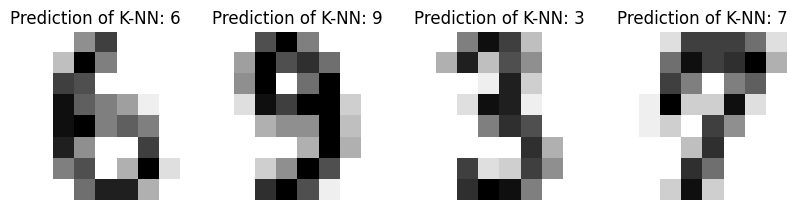

In [5]:
knn_predicted = knn.predict(X_test)

# Create subplot to visualize samples and predictions of K-NN for the first 4 test samples
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Loop through samples and corresponding predictions of K-NN
for ax, image, prediction in zip(axes, X_test, knn_predicted):
    ax.set_axis_off()  # Turn off the axes of the subplot
    image = image.reshape(8, 8)  # Reshape the sample to its original size 8x8
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")  # Display the image in grayscale
    ax.set_title(f"Prediction of K-NN: {prediction}")  # Set the title with K-NN's prediction
    
plt.show()

**Confusion Matrix**

Confusion matrix:
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  1]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  1  0  0  0  0 24]]


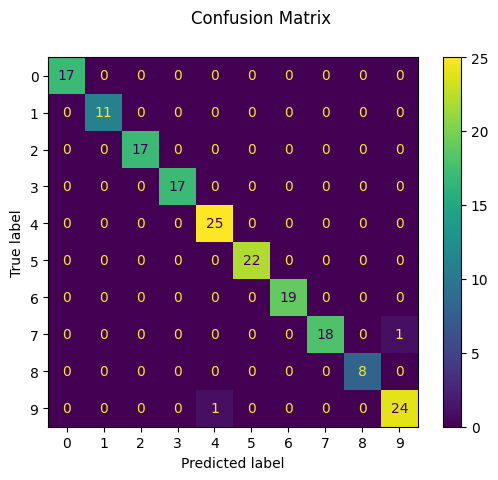

In [6]:
# Create and display confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, knn_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

#### Logistic Regression Model

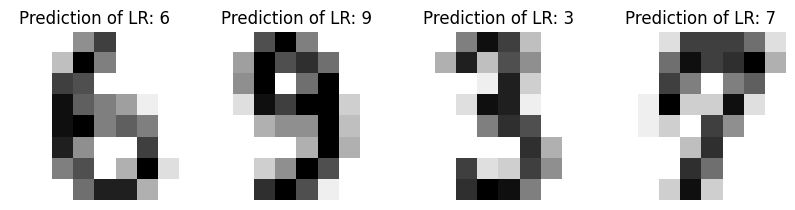

In [7]:
logistic_predicted = logistic.predict(X_test)

# Create subplot to visualize samples and predictions of Logistic Regression for the first 4 test samples
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Loop through samples and corresponding predictions of Logistic Regression
for ax, image, prediction in zip(axes, X_test, logistic_predicted):
    ax.set_axis_off()  # Turn off the axes of the subplot
    image = image.reshape(8, 8)  # Reshape the sample to its original size 8x8
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")  # Display the image in grayscale
    ax.set_title(f"Prediction of LR: {prediction}")  # Set the title with Logistic Regression's prediction

plt.show()

**Confusion Matrix**

Confusion matrix:
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  1  0  0  1  0]
 [ 0  0  0  0 25  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  1]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  1 24]]


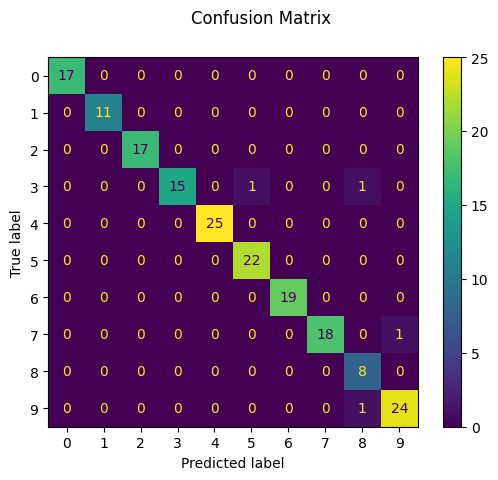

In [8]:
# Create and display confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, logistic_predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

### Some samples misclassified by one model but correctly classified by the other (and vice versa)

In [9]:
# Find samples where K-NN predicted incorrectly but Logistic Regression predicted correctly
incorrect_knn_correct_logistic = np.where((knn_predicted != y_test) & (logistic_predicted == y_test))[0]

# Find samples where Logistic Regression predicted incorrectly but K-NN predicted correctly
incorrect_logistic_correct_knn = np.where((logistic_predicted != y_test) & (knn_predicted == y_test))[0]

# Create DataFrame for samples where K-NN predicted incorrectly but Logistic Regression predicted correctly
df_incorrect_knn_correct_logistic = pd.DataFrame({
    'K-NN predicted': knn_predicted[incorrect_knn_correct_logistic],
    'Logistic Regression predicted': logistic_predicted[incorrect_knn_correct_logistic],
    'Actual': y_test[incorrect_knn_correct_logistic]
})

# Create DataFrame for samples where Logistic Regression predicted incorrectly but K-NN predicted correctly
df_incorrect_logistic_correct_knn = pd.DataFrame({
    'K-NN predicted': knn_predicted[incorrect_logistic_correct_knn],
    'Logistic Regression predicted': logistic_predicted[incorrect_logistic_correct_knn],
    'Actual': y_test[incorrect_logistic_correct_knn]
})

print("Number of samples where K-NN predicted incorrectly but Logistic Regression predicted correctly:", len(df_incorrect_knn_correct_logistic))
print("Number of samples where Logistic Regression predicted incorrectly but K-NN predicted correctly:", len(df_incorrect_logistic_correct_knn))

Number of samples where K-NN predicted incorrectly but Logistic Regression predicted correctly: 0
Number of samples where Logistic Regression predicted incorrectly but K-NN predicted correctly: 2


In [10]:
# Samples where K-NN predicted incorrectly but Logistic Regression predicted correctly
print(df_incorrect_knn_correct_logistic)

Empty DataFrame
Columns: [K-NN predicted, Logistic Regression predicted, Actual]
Index: []


In [11]:
# Samples where Logistic Regression predicted incorrectly but K-NN predicted correctly
print(df_incorrect_logistic_correct_knn)

   K-NN predicted  Logistic Regression predicted  Actual
0               3                              5       3
1               3                              8       3


### Some samples misclassified by both models

In [12]:
# Find samples where both models predicted incorrectly
incorrect_both_models = np.where((knn_predicted != y_test) & (logistic_predicted != y_test))[0]

print("Number of samples where both models predicted incorrectly:", len(incorrect_both_models))

print("\nSamples where both models predicted incorrectly:")
for idx in incorrect_both_models[:5]:  # Display the first 5 samples
    print(f"K-NN predicted: {knn_predicted[idx]}, Logistic Regression predicted: {logistic_predicted[idx]}, Actual: {y_test[idx]}")

Number of samples where both models predicted incorrectly: 2

Samples where both models predicted incorrectly:
K-NN predicted: 9, Logistic Regression predicted: 9, Actual: 7
K-NN predicted: 4, Logistic Regression predicted: 8, Actual: 9
